In [1]:
import os
import sys
sys.path.insert(0, os.path.join("..", "app"))
import dataset
import json
import numpy as np
from collections import namedtuple


In [2]:
meta = open(os.path.join("..", "files", "meta", "datasets.json"), encoding="utf-8").read()
meta = json.loads(meta)

In [3]:
def metrics(_all, processed, valid):
    return valid * _all / processed

In [4]:
def format_name(from_meta):
    return from_meta.replace(":", "_")

In [5]:
item = namedtuple("dataset", "preposition metrics")
def for_property(prop):
    for ds in meta["datasets_meta"]:
        _, preposition, _, p = format_name(ds["name"]).split("_")
        if p != prop:
            continue
        try:
            d = dataset.Dataset(format_name(ds["name"]), "..")
            valid = d.get_matches_count()
            yield item(preposition, metrics(ds["allMatches"], ds["processedMatches"], valid))
        except FileNotFoundError:
            pass # В таблице не участвует

In [6]:
def get_sortable_for(prop):
    doubling = [p for p in for_property(prop)]
    doubling_metrics = [x.metrics for x in doubling]
    doubling_normalized_metrics = doubling_metrics / np.linalg.norm(doubling_metrics)
    return [item(doubling[n].preposition, doubling_normalized_metrics[n]) for n, x in enumerate(doubling)]

In [7]:
import seaborn as sns

## Аппроксимативная инверсия

в 0.9889803861514107
до 0.08501133001401676
на 0.08196407980733023
через 0.0793465781765692
к 0.03944272523934031
за 0.010887025070210695
из 0.0011350457669715998
от 0.0010871379910929284
с 0.0002174275982185857
у 0.0002174275982185857
без 0.00010871379910929284
из-за 0.00010871379910929284
о 0.00010871379910929284
по 0.00010871379910929284
при 0.00010871379910929284


<AxesSubplot:>

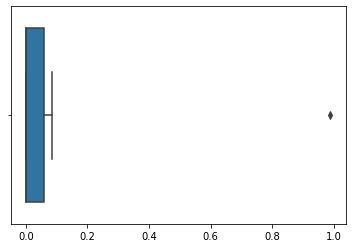

In [8]:
ApproximativeInversion = get_sortable_for('АппроксИнверсия')
for x in sorted(ApproximativeInversion, key=lambda x: x.metrics, reverse=True):
    print(x.preposition, x.metrics)
sns.boxplot(x = [p.metrics for p in ApproximativeInversion])

Выброс на ящике: экстремально частотные конструкции типа "X-ах в Y-е"

## Удвоение предлога

на 0.7632304099495865
у 0.44006060254406043
в 0.36126370743601205
за 0.1660606047336077
с 0.16329292798804756
по 0.12454545355020577
от 0.10517171633128487
из 0.06642424189344308
к 0.06088888840232282
о 0.04981818142008231
под 0.03044444420116141
про 0.019373737218920897
до 0.01660606047336077
без 0.011070706982240514
над 0.011070706982240514
из-за 0.005535353491120257
при 0.005535353491120257
для 0.0027676767455601286
перед 0.0027676767455601286


<AxesSubplot:>

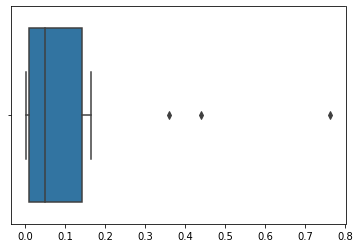

In [9]:
PrepositionDoubling = get_sortable_for('Удвоение')
for x in sorted(PrepositionDoubling, key=lambda x: x.metrics, reverse=True):
    print(x.preposition, x.metrics)
sns.boxplot(x = [p.metrics for p in PrepositionDoubling])

Три верхних выброса по возрастанию частотности: *в X-е в Z-м*, *у X-a у Z-го*, *на X-e на Z-м*

## Интерпозиция с двойным рефлексивом

по 0.9822579521191659
с 0.15962487435920714
за 0.05407278850384031
в 0.051469558967760544
на 0.04229849732746297
для 0.033859865182166674
от 0.020271881190758827
про 0.017004208399467733
о 0.012889261699829504
над 0.0123594945151635
у 0.00874761950817538
к 0.005793513053982891
из 0.005214161748584602
перед 0.004827927544985742
до 0.0007724684071977188
под 0.0005793513053982891
через 0.00025748946906590625
при 0.00012874473453295312


<AxesSubplot:>

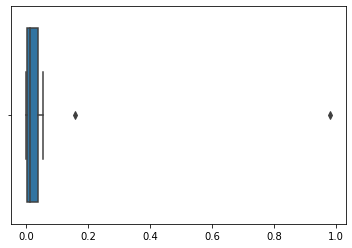

In [10]:
DoubleReflInterposition = get_sortable_for('ДвРефлексивИнтерпозиция')
for x in sorted(DoubleReflInterposition, key=lambda x: x.metrics, reverse=True):
    print(x.preposition, x.metrics)
sns.boxplot(x = [p.metrics for p in DoubleReflInterposition])

Выбросы по убыванию: конструкции типа **сам по себе** "экстремально" частотны; также **сам с собой**

## Интерпозиция с отрицательными местоимениями

в 0.6889154633680472
за 0.41275039870932917
о 0.40819542826516847
с 0.3414913899338539
у 0.16406653157524906
при 0.16248981103688573
от 0.09191268165835305
для 0.06892403895043372
перед 0.04524311989248058
под 0.03733277341572128
до 0.029173805646569826
про 0.0271108337013025
по 0.011737808452260209
через 0.006525871117114818
над 0.005912702018862419
из 0.005562319677003905
из-за 0.0006569668909847132
без 8.759558546462843e-05


<AxesSubplot:>

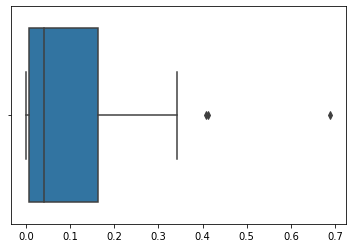

In [11]:
NegPronInterposition = get_sortable_for('ОтрМестИнтерпозиция')
for x in sorted(NegPronInterposition, key=lambda x: x.metrics, reverse=True):
    print(x.preposition, x.metrics)
sns.boxplot(x = [p.metrics for p in NegPronInterposition])

## Интерпозиция с амальгамами

с 0.5210165921805386
о 0.4265323986805182
на 0.4038096284354124
в 0.3973658577688899
за 0.25775082666090154
для 0.24056743821684143
до 0.1825735022181386
к 0.14176295466349584
от 0.13961503110798834
у 0.12887541333045077
из 0.08806486577580802
из-за 0.047254318221165284
над 0.034366776888120204
про 0.019331311999567617
перед 0.012887541333045077
по 0.008591694222030051
под 0.0042958471110150255
без 0.0021479235555075128
при 0.0021479235555075128


<AxesSubplot:>

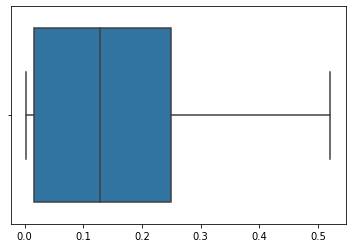

In [12]:
AmalgInterposition = get_sortable_for('АмальгамыИнтерпозиция')
for x in sorted(AmalgInterposition, key=lambda x: x.metrics, reverse=True):
    print(x.preposition, x.metrics)
sns.boxplot(x = [p.metrics for p in AmalgInterposition])